<a href="https://colab.research.google.com/github/helioRocha/dio-ccde-p01/blob/master/An%C3%A1lise_de_dados_com_Python_e_Pandas_(CCDE_%7C_p01).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#import plotly.express as px
#import plotly.offline as py
#import plotly.graph_objs as go

%matplotlib inline

# plt.style.use('bmh')

# from google.colab import files
# arq = files.upload()

#!pip install bubbly
#!pip install chart-studio 
#!pip install --upgrade plotly

## (Re)uso

Funções consumidas no estudo dos dataframes

In [2]:
def check(df):
    res = list(df.isna().sum().items())
    n = [res[i][0] for i in range(len(res)) if res[i][1]>0]

    if len(n)==0: print(f'>> Nao ha colunas com valores null/NaN.\n')
    elif len(n)==1: print(f">> Ha {len(n)} coluna com valores null/NaN: {' '.join(n)}\n")
    else: print(f">> Ha {len(n)} colunas com valores null/NaN: {', '.join(n)}\n")


def commonEDA(df):
    print('>> Estas sao as primeiras 5 linhas do df sob investigação:\n')
    print(df.head(),'\n')
    print('>> E a seguir temos as suas ultimas linhas:\n')
    print(df.tail(),'\n')
    print(f'>> Na sequencia, sao apresentadas informacoes sobre o df - que \ntem {df.shape[0]} linha(s) e {df.shape[1]} coluna(s) -, incluindo o tipo de indice \ne os tipos de coluna, valores nao nulos e uso de memoria:\n')
    print(df.info(),'\n')    
    check(df)    
    print('>> Enfim, e apresentado o sumario estatistico para features numericas\n do df:\n')
    print(df.describe(),'\n')



In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'   
   UNDERLINE = '\033[4m'
   BOLD = '\033[1m'
   END = '\033[0m'

def bold(words): print(color.BOLD + words + color.END)

# Conteudo

- [Parte 1: Gapminder](#Parte-1:-Gapminder)
- [Parte 2: Vendas NE](#Parte-2:-Vendas-NE)
- [Parte 3: AdventureWorks](#Parte-3:-AdventureWorks)

## *Parte 1: Gapminder*

In [4]:
url = 'https://raw.githubusercontent.com/helioRocha/dio-ccde-p01/master/datasets/Gapminder.csv'
df1 = pd.read_csv(url, error_bad_lines=False, delimiter=";")

commonEDA(df1)

>> Estas sao as primeiras 5 linhas do df sob investigação:

       country continent  year  lifeExp       pop   gdpPercap
0  Afghanistan      Asia  1952   28.801   8425333  779.445314
1  Afghanistan      Asia  1957   30.332   9240934  820.853030
2  Afghanistan      Asia  1962   31.997  10267083  853.100710
3  Afghanistan      Asia  1967   34.020  11537966  836.197138
4  Afghanistan      Asia  1972   36.088  13079460  739.981106 

>> E a seguir temos as suas ultimas linhas:

       country continent  year  lifeExp       pop   gdpPercap
3307  Zimbabwe    Africa  1987   62.351   9216418  706.157306
3308  Zimbabwe    Africa  1992   60.377  10704340  693.420786
3309  Zimbabwe    Africa  1997   46.809  11404948  792.449960
3310  Zimbabwe    Africa  2002   39.989  11926563  672.038623
3311  Zimbabwe    Africa  2007   43.487  12311143  469.709298 

>> Na sequencia, sao apresentadas informacoes sobre o df - que 
tem 3312 linha(s) e 6 coluna(s) -, incluindo o tipo de indice 
e os tipos de coluna

In [5]:
'''
def display_query(a, b, f1='year', f2='pop', color='country'):
    
    fig = px.bar(df1.query(f"{a} == '{b}'"), 
                 x=f1, 
                 y=f2, 
                 hover_data=['lifeExp'],
                 labels={'pop':'Populacao', 'year':'Ano', 'lifeExp':'Expectativa de vida', 'country':''}, 
                 height=550,
                 title=f"Populacao d_ {b}",
                 color=color)
    
    fig.show()


display_query('continent','Americas')

display_query('country','United States',color='pop')
'''

'\ndef display_query(a, b, f1=\'year\', f2=\'pop\', color=\'country\'):\n    \n    fig = px.bar(df1.query(f"{a} == \'{b}\'"), \n                 x=f1, \n                 y=f2, \n                 hover_data=[\'lifeExp\'],\n                 labels={\'pop\':\'Populacao\', \'year\':\'Ano\', \'lifeExp\':\'Expectativa de vida\', \'country\':\'\'}, \n                 height=550,\n                 title=f"Populacao d_ {b}",\n                 color=color)\n    \n    fig.show()\n\n\ndisplay_query(\'continent\',\'Americas\')\n\ndisplay_query(\'country\',\'United States\',color=\'pop\')\n'

In [6]:
bold(f"Continente (numero de paises): Pais\n")

c = df1['continent'].unique()
for p in range(len(c)):
    o = df1.loc[df1['continent']==c[p]]
    if len(o['country'].unique()) != 0:
        print(f"{c[p]} ({len(o['country'].unique())}): {', '.join(o['country'].unique())}\n")

Continente (numero de paises): Pais

Asia (41): Afghanistan, Azerbaijan, Bahrain, Bangladesh, Bhutan, Brunei, Cambodia, China, India, Indonesia, Iran, Iraq, Israel, Japan, Jordan, Korea, Dem. Rep., Korea, Rep., Kuwait, Lebanon, Macao, China, Malaysia, Mongolia, Myanmar, Nepal, Oman, Pakistan, Philippines, Qatar, Saudi Arabia, Singapore, Sri Lanka, Syria, Taiwan, Tajikistan, Thailand, Timor-Leste, Turkmenistan, United Arab Emirates, Vietnam, West Bank and Gaza, Yemen, Rep.

Europe (35): Albania, Austria, Belgium, Bosnia and Herzegovina, Bulgaria, Croatia, Cyprus, Czech Republic, Denmark, Estonia, Finland, France, Germany, Greece, Hungary, Iceland, Ireland, Italy, Luxembourg, Malta, Moldova, Montenegro, Netherlands, Norway, Poland, Portugal, Romania, Serbia, Slovak Republic, Slovenia, Spain, Sweden, Switzerland, Turkey, United Kingdom

Africa (51): Algeria, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Cape Verde, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Con

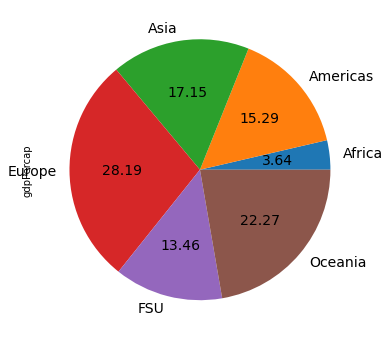

In [7]:
df1.groupby('continent')['gdpPercap'].mean().plot(kind='pie', autopct='%.2f', fontsize=14, figsize=(6, 6));

## Parte 2: Vendas NE

In [8]:
url_ara = 'https://github.com/helioRocha/dio-ccde-p01/blob/master/datasets/Aracaju.xlsx?raw=True'
url_for = 'https://github.com/helioRocha/dio-ccde-p01/blob/master/datasets/Fortaleza.xlsx?raw=True'
url_nat = 'https://github.com/helioRocha/dio-ccde-p01/blob/master/datasets/Natal.xlsx?raw=True'
url_rec = 'https://github.com/helioRocha/dio-ccde-p01/blob/master/datasets/Recife.xlsx?raw=True'
url_sal = 'https://github.com/helioRocha/dio-ccde-p01/blob/master/datasets/Salvador.xlsx?raw=True'

araca = pd.read_excel(url_ara)
forta = pd.read_excel(url_for)
natal = pd.read_excel(url_nat)
recif = pd.read_excel(url_rec)
salva = pd.read_excel(url_sal)

In [9]:
df2 = pd.concat([araca,forta,natal,recif,salva])

commonEDA(df2)

>> Estas sao as primeiras 5 linhas do df sob investigação:

    Cidade       Data  Vendas  LojaID  Qtde
0  Aracaju 2018-01-01  142.00    1520     1
1  Aracaju 2018-01-01   14.21    1522     6
2  Aracaju 2018-01-01   71.55    1520     1
3  Aracaju 2018-01-01    3.01    1521     7
4  Aracaju 2018-01-01   24.51    1522     8 

>> E a seguir temos as suas ultimas linhas:

       Cidade       Data  Vendas  LojaID  Qtde
235  Salvador 2019-01-03   41.84    1034     1
236  Salvador 2019-01-03  126.29    1035     3
237  Salvador 2019-01-03   38.06    1036     3
238  Salvador 2019-01-03  139.64    1035     1
239  Salvador 2019-01-03  161.41    1037     3 

>> Na sequencia, sao apresentadas informacoes sobre o df - que 
tem 894 linha(s) e 5 coluna(s) -, incluindo o tipo de indice 
e os tipos de coluna, valores nao nulos e uso de memoria:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 894 entries, 0 to 239
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------ 

In [10]:
df2['LojaID'] = df2['LojaID'].astype('object')

#### Tratando valores 

In [11]:
df2['Vendas'].fillna(df2['Vendas'].mean(), inplace=True)

In [12]:
df2['Vendas'].fillna(0, inplace=True)

In [13]:
df2.dropna(inplace=True)

In [14]:
df2.dropna(subset=['Vendas'], inplace=True)

In [15]:
df2.dropna(how='all', inplace=True)

#### Desnormalizações

In [16]:
df2['Receita'] = df2['Vendas'].mul(df2['Qtde'])

In [17]:
df2['Receita'].max()

3544.0

In [18]:
df2['Receita/Vendas'] = df2['Receita'] / df2['Vendas']

#### Filtragens/reorganizações

In [19]:
df2.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [20]:
df2.nsmallest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [21]:
df2.sort_values('Receita', ascending=True).groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [22]:
df2.sort_values('Receita', ascending=False)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.00,853,4,3544.00,4.0
55,Natal,2019-01-08,859.00,854,4,3436.00,4.0
51,Natal,2018-01-21,859.00,852,4,3436.00,4.0
30,Natal,2018-10-02,856.00,853,4,3424.00,4.0
41,Natal,2018-05-20,835.00,852,4,3340.00,4.0
...,...,...,...,...,...,...,...
95,Natal,2019-01-02,5.13,1035,1,5.13,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0
92,Salvador,2019-01-01,4.57,1035,1,4.57,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0


In [23]:
df2['Data'] = df2['Data'].astype('int64')

In [24]:
df2['Data'] = pd.to_datetime(df2['Data'])

In [25]:
df2.groupby(df2['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [26]:
df2['Ano_Venda'] = df2['Data'].dt.year

In [27]:
df2['Mes_Venda'], df2['Dia_Venda'] = (df2['Data'].dt.month, df2['Data'].dt.day)

In [28]:
df2['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [29]:
df2['dif_dias'] = df2['Data'] - df2['Data'].min()

In [30]:
df2['Trimestre_Venda'] = df2['Data'].dt.quarter

In [31]:
df2.sample(91)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,dif_dias,Trimestre_Venda
46,Salvador,2019-01-01,34.84,1034,3,104.52,3.0,2019,1,1,365 days,1
105,Fortaleza,2019-01-01,174.66,1004,1,174.66,1.0,2019,1,1,365 days,1
64,Fortaleza,2019-01-01,110.31,1005,4,441.24,4.0,2019,1,1,365 days,1
97,Recife,2019-01-01,153.04,983,4,612.16,4.0,2019,1,1,365 days,1
83,Aracaju,2018-01-01,14.44,1520,5,72.20,5.0,2018,1,1,0 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
91,Natal,2019-01-02,17.74,1035,1,17.74,1.0,2019,1,2,366 days,1
2,Natal,2019-03-11,308.00,852,3,924.00,3.0,2019,3,11,434 days,1
216,Salvador,2019-01-02,5.82,1035,1,5.82,1.0,2019,1,2,366 days,1
101,Aracaju,2018-01-01,16.62,1520,9,149.58,9.0,2018,1,1,0 days,1


#### Derivações específicas

In [32]:
vendas_mar_19 = df2.loc[(df2['Data'].dt.year == 2019) & (df2['Data'].dt.month == 3)]

In [33]:
vendas_mar_19

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,Mes_Venda,Dia_Venda,dif_dias,Trimestre_Venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


#### Visualizações

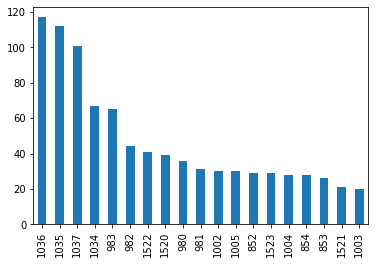

In [34]:
df2['LojaID'].value_counts(ascending=False).plot.bar();

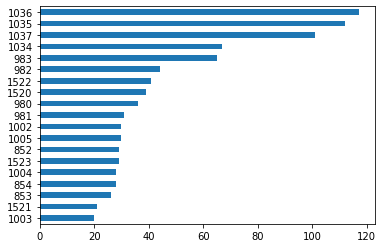

In [35]:
df2['LojaID'].value_counts(ascending=True).plot.barh();

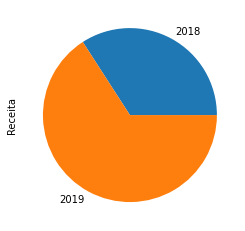

In [36]:
df2.groupby(df2['Data'].dt.year)['Receita'].sum().plot.pie();

In [37]:
df2['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

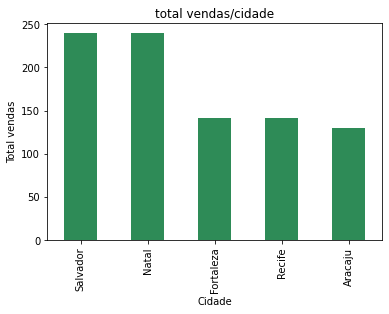

In [38]:
df2['Cidade'].value_counts().plot.bar(title='total vendas/cidade',color='seagreen')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [39]:
plt.style.use('ggplot')

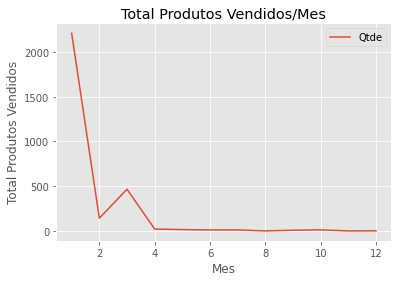

In [40]:
df2.groupby(df2['Mes_Venda'])['Qtde'].sum().plot(title = 'Total Produtos Vendidos/Mes')
plt.xlabel('Mes')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

In [41]:
df_2019 = df2[df2['Ano_Venda']==2019]

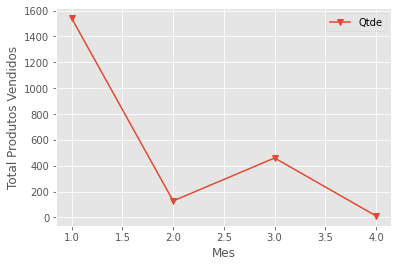

In [42]:
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='v')
plt.xlabel('Mes')
plt.ylabel('Total Produtos Vendidos')
plt.legend();

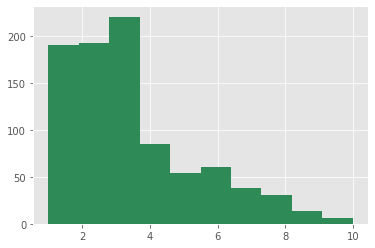

In [43]:
plt.hist(df2['Qtde'], color='seagreen');

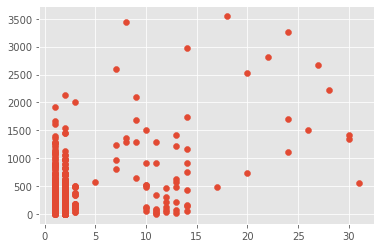

In [44]:
plt.scatter(x=df_2019['Dia_Venda'], y = df_2019['Receita']);

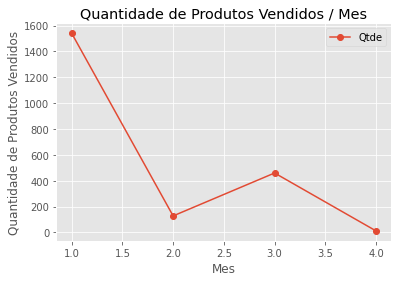

In [45]:
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='o')
plt.title('Quantidade de Produtos Vendidos / Mes')
plt.xlabel('Mes')
plt.ylabel('Quantidade de Produtos Vendidos')
plt.legend();
#plt.savefig('grafico.png')

## Parte 3: AdventureWorks

In [46]:
plt.style.use('seaborn')

In [47]:
url = 'https://github.com/helioRocha/dio-ccde-p01/blob/master/datasets/AdventureWorks.xlsx?raw=True'
df = pd.read_excel(url)

commonEDA(df)

>> Estas sao as primeiras 5 linhas do df sob investigação:

  Data Venda Data Envio  ID Loja  ...            Marca   Classe  Cor
0 2008-05-09 2008-05-29      199  ...  Adventure Works  Regular  Red
1 2008-05-12 2008-05-17      306  ...  Adventure Works  Regular  Red
2 2008-05-14 2008-05-20      306  ...  Adventure Works  Regular  Red
3 2008-05-21 2008-05-27      306  ...  Adventure Works  Regular  Red
4 2008-06-20 2008-06-27      306  ...  Adventure Works  Regular  Red

[5 rows x 16 columns] 

>> E a seguir temos as suas ultimas linhas:

    Data Venda Data Envio  ID Loja  ...     Marca   Classe    Cor
899 2008-03-22 2008-04-04      306  ...  Fabrikam  Regular  Black
900 2008-10-04 2008-10-15      306  ...  Fabrikam  Regular  Black
901 2008-12-11 2008-12-15      306  ...  Fabrikam  Regular  Black
902 2008-12-17 2008-12-21      306  ...  Fabrikam  Regular  Black
903 2008-12-21 2008-12-25      306  ...  Fabrikam  Regular  Black

[5 rows x 16 columns] 

>> Na sequencia, sao apresentadas i

In [48]:
df.groupby('ID Cliente')['Produto'].sum()

ID Cliente
18815    Adventure Works Laptop15.4W M1548 RedFabrikam ...
18816    Fabrikam Trendsetter 2/3'' 17mm X100 GreyFabri...
18819    Fabrikam Trendsetter 1/3'' 8.5mm X200 WhiteFab...
18822    Fabrikam Trendsetter 1/3'' 8.5mm X200 WhiteFab...
18823    Fabrikam Trendsetter 2/3'' 17mm X100 BlackAdve...
                               ...                        
19137    Adventure Works Laptop15.4W M1548 RedFabrikam ...
19138    Fabrikam Trendsetter 1/3'' 8.5mm X200 WhiteAdv...
19139    Headphone Adapter for Contoso Phone E130 Silve...
19140    Fabrikam Trendsetter 1/3'' 8.5mm X200 WhiteAdv...
19145    Adventure Works Laptop15.4W M1548 RedFabrikam ...
Name: Produto, Length: 168, dtype: object

In [49]:
df['Valor Venda'].sum()

5984606.1426

In [50]:
df['Custo']=df['Custo Unitário'].mul(df['Quantidade'])

In [51]:
round(df['Custo'].sum(), 2)

2486783.05

In [52]:
df['Lucro'] = df['Valor Venda'] - df['Custo']

In [53]:
round(df['Lucro'].sum(), 2)

3497823.09

In [54]:
df['Tempo_envio'] = (df['Data Envio']-df['Data Venda']).dt.days

#### Visualizações

In [55]:
df.groupby('Marca')['Tempo_envio'].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo_envio, dtype: float64

In [56]:
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo_envio       0
dtype: int64

In [57]:
df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum()
pd.options.display.float_format = '{:20,.2f}'.format

lucro_ano = df.groupby([df['Data Venda'].dt.year, 'Marca'])['Lucro'].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [58]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

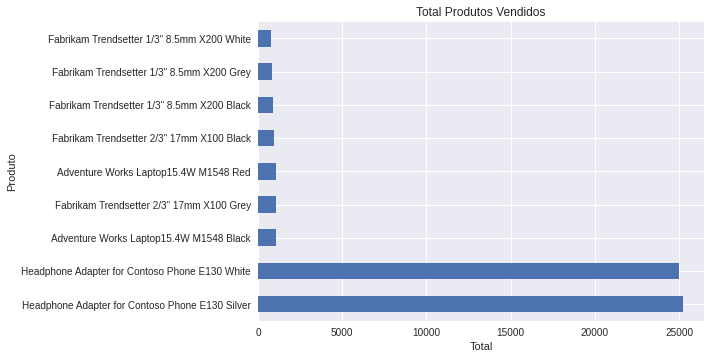

In [59]:
df.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False).plot.barh(title='Total Produtos Vendidos')
plt.xlabel('Total')
plt.ylabel('Produto');

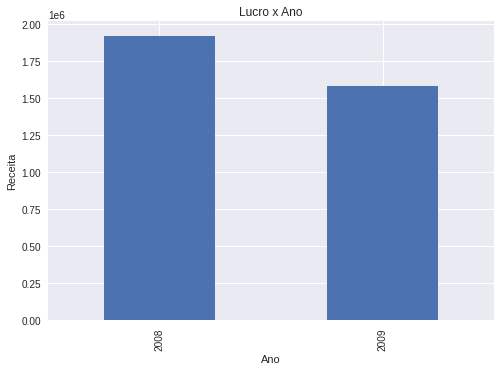

In [60]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum().plot.bar(title='Lucro x Ano')
plt.xlabel('Ano')
plt.ylabel('Receita');

In [61]:
df.groupby(df['Data Venda'].dt.year)['Lucro'].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [62]:
df_2009 = df[df['Data Envio'].dt.year == 2009]

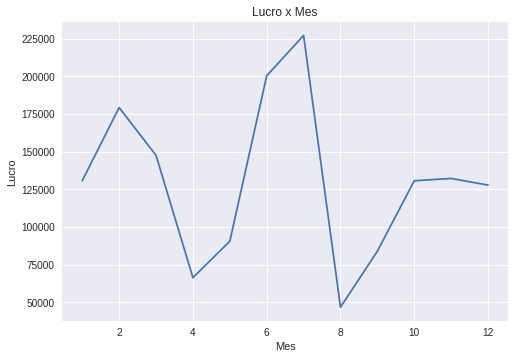

In [63]:
df_2009.groupby(df_2009['Data Venda'].dt.month)['Lucro'].sum().plot(title='Lucro x Mes')
plt.xlabel('Mes')
plt.ylabel('Lucro');

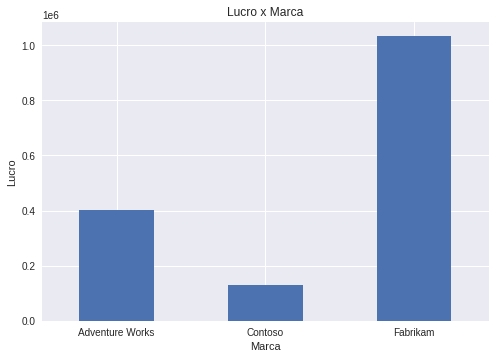

In [64]:
df_2009.groupby('Marca')['Lucro'].sum().plot.bar(title='Lucro x Marca')
plt.xlabel('Marca')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

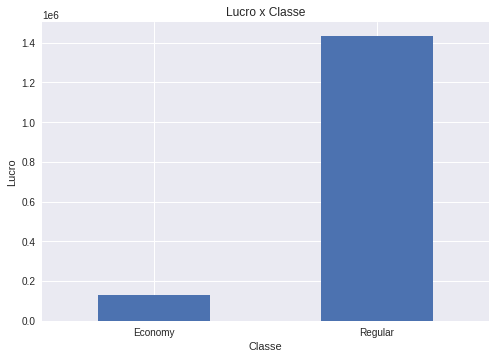

In [65]:
df_2009.groupby('Classe')['Lucro'].sum().plot.bar(title='Lucro x Classe')
plt.xlabel('Classe')
plt.ylabel('Lucro')
plt.xticks(rotation='horizontal');

In [66]:
df['Tempo_envio'].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo_envio, dtype: float64

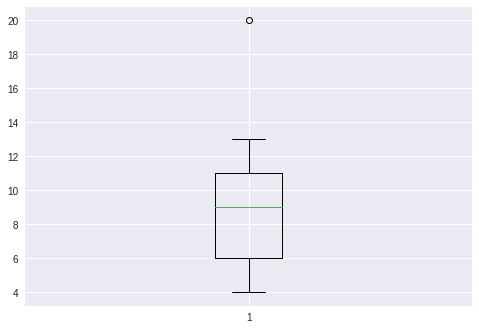

In [67]:
plt.boxplot(df['Tempo_envio']);

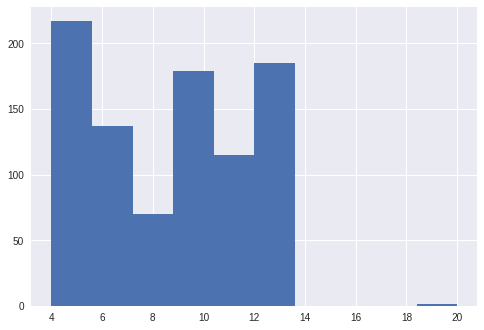

In [68]:
plt.hist(df['Tempo_envio']);

In [69]:
df['Tempo_envio'].min()

4

In [70]:
df['Tempo_envio'].max()

20

In [71]:
# Tupla correspondente ao tempo de envio maximo
df[df['Tempo_envio'] == df['Tempo_envio'].max()]['Produto']

0    Adventure Works Laptop15.4W M1548 Red
Name: Produto, dtype: object

In [72]:
#df.to_csv('df_analise.csv', index=False)